<a href="https://colab.research.google.com/github/Leito2022/ProyectoHenryML/blob/main/proyectoHenry2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto N° 2 de ML - Henry


Autor: Rodríguez Jorge Leonardo


Fecha: 14/12/2022

Última edición 14/12/2022


PARA MEJOR MANEJO DE LOS INDICES CREADOS RECOMIENDO VISUALIZAR ESTE TRABAJO EN GOOGLE COLAB.



En este proyecto el objetivo es lograr crear un modelo de machine learning capaz de predecir el tiempo que un paciente permanecerá internado ocupando una cama en una habitación. Con esta información es posible estimar los recursos que serán necesarios disponer en caso de la estadía sea prolongada y por tanto evitar escases o faltante de ciertos elementos o insumos.


# Librerias



In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Importe librerías de varios modelos que practiqué pero sin resultados buenos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import f1_score

# DESCRIPCION DE VARIABLE




-Available Extra Rooms in Hospital: Habitaciones adicionales disponibles en el 
hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.


-Department: Área de atención a la que ingresa el paciente.


-Ward_Facility_Code: Código de la habitación del paciente.


-doctor_name: Nombre de el/la doctor/a a cargo del paciente.


-staff_available: Cantidad de personal disponible al momento del ingreso del paciente.


-patientid: Identificador del paciente.


-Age: Edad del paciente.


-gender: Género del paciente.


-Type of Admission: Tipo de ingreso registrado según la situación de ingreso del paciente.


-Severity of Illness: Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.


-health_conditions: Condiciones de salud del paciente.


-Visitors with Patient: Cantidad de visitantes registrados para el paciente.


-Insurance: Indica si la persona posee o no seguro de salud.


-Admission_Deposit: Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación.


-Stay (in days): Días registrados de estancia hospitalaria.​

# EDA

Realizo un EDA para encontrar nulos, valores extraños y outliers. Me adentro a la idea de que significa cada variable.

In [5]:
#Importo los datasets

df = pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_train.csv")
df_1 = pd.read_csv("https://raw.githubusercontent.com/soyHenry/Datathon/main/hospitalizaciones_test.csv")

In [6]:
#Agrego la columna target (type_stay)

df["type_stay"] = np.where(df["Stay (in days)"] > 8, 1,0)

In [7]:
df.info() # Verifico el tipo de datos que tiene cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [8]:
df.isna().sum() #Verifico si hay nulos

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
type_stay                            0
dtype: int64

In [9]:
df.sample(5) #Saco una muestra aleatoria para visualizar los datos

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),type_stay
33640,3,gynecology,F,Dr Sarah,10,129000,41-50,Female,Urgent,Minor,High Blood Pressure,2,Yes,5289.204636,7,0
369886,1,gynecology,B,Dr Olivia,6,127797,41-50,Female,Trauma,Moderate,None,4,Yes,4051.120390,8,0
172972,7,gynecology,D,Dr Sarah,1,5205,11-20,Female,Emergency,Moderate,Asthama,4,Yes,4644.690122,9,1
235909,3,gynecology,D,Dr Olivia,6,3689,31-40,Female,Trauma,Moderate,None,3,Yes,6851.951059,8,0
316321,10,gynecology,D,Dr Nathan,1,78376,41-50,Female,Trauma,Extreme,None,2,No,4925.138286,10,1


In [10]:
#Observo las categorias y valores unicos de la mayoría de las columnas
df.Department.unique()
df.doctor_name.unique()
df.staff_available.unique()
df.Age.unique()
df.gender.unique()
df.health_conditions.unique() #Aquí no se puede considerar Nulo a NONE ya que hace referencia a que el paciente no tiene ninguna dolencia previa.
df.Ward_Facility_Code.unique()

array(['D', 'B', 'E', 'F', 'A', 'C'], dtype=object)

In [11]:
#Presencia del valor 1 sobre el 0 en la columna target, esto tambien lo repito con las distintas columnas para ver el peso 
#que tienen las distintas categorias

df.type_stay.value_counts(True)

1    0.622966
0    0.377034
Name: type_stay, dtype: float64

#SELECCIÓN DE FEATURES

# Variables numéricas

Comenzamos observando las variables numéricas y analizando si es posible encontrar correlación con la variable target.


In [12]:
# Creamos una correlación de Pearson sobre las variables numericas

numeric_features = list(df.select_dtypes(np.number).columns) # Creamos lista de atributos numericos
df_numeric = df[numeric_features + ['type_stay']] # Cramos un dataframe con las columnas deseadas y la variable target

df_numeric.corr()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),type_stay,type_stay
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,0.071073,-0.050775,-0.019383,0.053894,0.053894
staff_available,-0.003064,1.000000,-0.000350,0.001444,0.000816,0.006673,0.002883,0.002883
patientid,-0.005426,-0.000350,1.000000,-0.006393,0.011602,0.005567,-0.000532,-0.000532
Visitors with Patient,0.071073,0.001444,-0.006393,1.000000,-0.069566,0.027284,-0.009529,-0.009529
Admission_Deposit,-0.050775,0.000816,0.011602,-0.069566,1.000000,0.043899,-0.016650,-0.016650
Stay (in days),-0.019383,0.006673,0.005567,0.027284,0.043899,1.000000,0.493378,0.493378
type_stay,0.053894,0.002883,-0.000532,-0.009529,-0.016650,0.493378,1.000000,1.000000
type_stay,0.053894,0.002883,-0.000532,-0.009529,-0.016650,0.493378,1.000000,1.000000


Las correlaciones en las variables numéricas son bastante pobres, no me da certeza alguna de que pueda utilizar alguna de estas características. 

# Variables Categoricas


Procedo a analizar la correlación con las variables categóricas. Primero analizaré su distribución con respecto a la variable target de forma gráfica y luego calcularé el valor de chi 2.

In [89]:
categorical_features = list(df.select_dtypes(object).columns) # Creo lista de atributos categoricos
df_categ = df[categorical_features + ['type_stay']] # Creo un dataframe con las columnas deseadas y la variable target

categorical_features:     ['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']


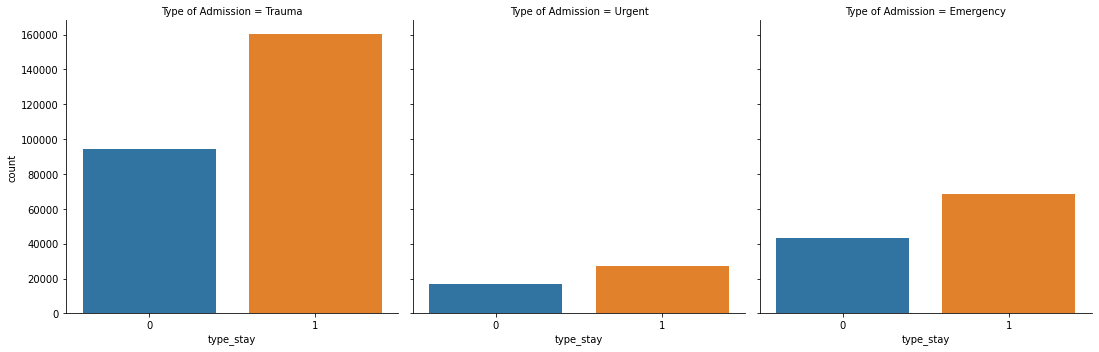

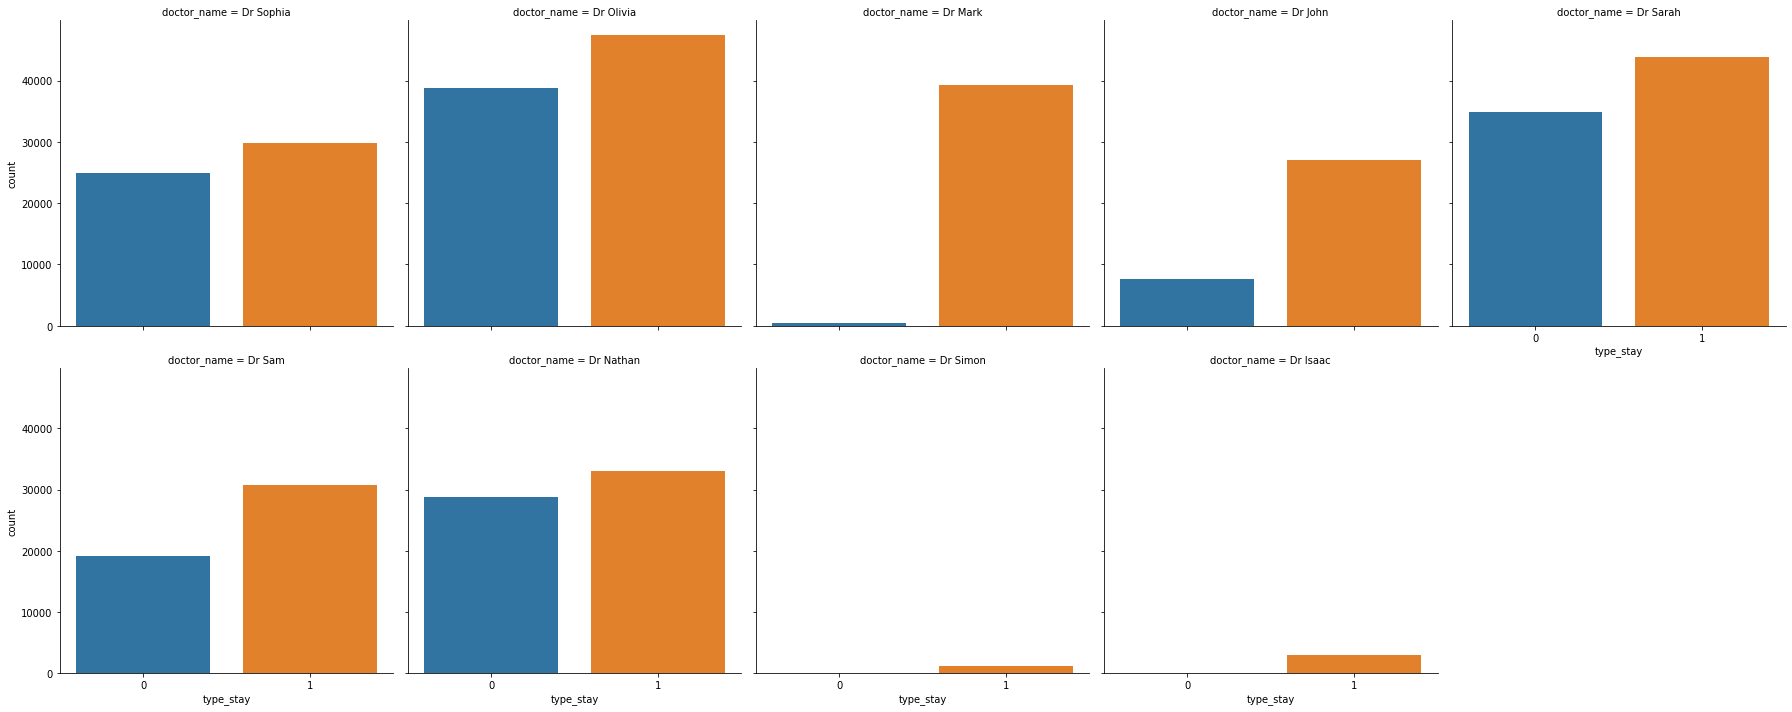

In [90]:
print('categorical_features:    ', categorical_features)

plot02 = sns.catplot(kind='count', x = "type_stay", col = 'Type of Admission', 
                     col_wrap = 5, data=df_categ, 
                     ) # Instanciamos pairplot

plot03 = sns.catplot(kind='count', x = "type_stay", col = "doctor_name", 
                     col_wrap = 5, data=df_categ, 
                     ) # Instanciamos pairplot



Esto lo he realizado de a pares y observando todas las variables. Lamentablemente no hay una categoría que permita determinar una correlación en términos
estadísticos y que no de lugar a dudas de ello, siempre hay que tener en cuenta que el nivel de proporción en el target
es ligeramente desproporcionada, dando casi 62% a la internación de más de 8 días.

In [15]:
#Como vamos a aplicar modelos de clasificación debemos usar metodos acordes a ello
from sklearn.feature_selection import chi2
from sklearn.preprocessing	import OrdinalEncoder

enc = OrdinalEncoder()
df_categ.columns

Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance', 'type_stay'],
      dtype='object')

In [16]:
enc.fit(df_categ[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance', 'type_stay']])

OrdinalEncoder()

In [17]:
df_categ[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance', 'type_stay']] = enc.transform(df_categ[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance', 'type_stay']])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [18]:
df_categ.head()

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,type_stay
0,2.0,3.0,8.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0
1,2.0,1.0,8.0,3.0,0.0,1.0,1.0,2.0,0.0,1.0
2,2.0,1.0,8.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2.0,3.0,4.0,3.0,0.0,2.0,2.0,4.0,0.0,0.0
4,1.0,4.0,2.0,7.0,1.0,1.0,2.0,1.0,0.0,1.0


In [19]:
#Comprobamos que las columnas posean elementos unicos iguales a cuando eran string.
df_categ.nunique()

Department              5
Ward_Facility_Code      6
doctor_name             9
Age                    10
gender                  3
Type of Admission       3
Severity of Illness     3
health_conditions       6
Insurance               2
type_stay               2
dtype: int64

Creamos un data set con las variables numéricas y las categoricas ya numerizadas.

In [20]:
df_train_test = pd.concat([df_categ.iloc[:,:9], df.select_dtypes(np.number)], axis = 1)

In [21]:
df_train_test.head()

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),type_stay
0,2.0,3.0,8.0,4.0,0.0,1.0,0.0,1.0,1.0,4,0,33070,4,2966.408696,8,0
1,2.0,1.0,8.0,3.0,0.0,1.0,1.0,2.0,0.0,4,2,34808,2,3554.835677,9,1
2,2.0,1.0,8.0,2.0,0.0,1.0,0.0,1.0,1.0,2,8,44577,2,5624.733654,7,0
3,2.0,3.0,4.0,3.0,0.0,2.0,2.0,4.0,0.0,4,7,3695,4,4814.149231,8,0
4,1.0,4.0,2.0,7.0,1.0,1.0,2.0,1.0,0.0,2,10,108956,2,5169.269637,34,1


# APLICACION DE MODELOS

#Modelo de regresión logística con todas las features.

In [22]:
#Voy a probar regresión logística con todas las features a excepción de patientid y Stay(in days)
df_regre_1 = df_train_test
df_regre_1.drop(["patientid","Admission_Deposit","Stay (in days)"], axis = 1, inplace = True)

In [23]:
X = df_regre_1.iloc[:,:12]
y = df_regre_1.iloc[:,-1]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)
# Estandarizo los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = scaler.transform(X_test)

In [25]:
pd.DataFrame(y_test).value_counts(normalize=True)

type_stay
1            0.62278
0            0.37722
dtype: float64

In [26]:
pd.DataFrame(y_train).value_counts(normalize=True)

type_stay
1            0.623045
0            0.376955
dtype: float64

In [27]:
# Aplico un .describe() a ambos para ver los resultados de la estandarizacion de variables
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Department,287000.0,2.008958,0.692957,0.0,2.0,2.0,2.0,4.0
Ward_Facility_Code,287000.0,2.947052,1.690068,0.0,1.0,3.0,4.0,5.0
doctor_name,287000.0,4.422192,2.070179,0.0,3.0,4.0,6.0,8.0
Age,287000.0,3.125979,1.628524,0.0,2.0,3.0,4.0,9.0
gender,287000.0,0.313254,0.549715,0.0,0.0,0.0,1.0,2.0
Type of Admission,287000.0,0.835923,0.592732,0.0,0.0,1.0,1.0,2.0
Severity of Illness,287000.0,1.389213,0.765288,0.0,1.0,2.0,2.0,2.0
health_conditions,287000.0,3.011237,1.681518,0.0,1.0,4.0,4.0,5.0
Insurance,287000.0,0.830516,0.375180,0.0,1.0,1.0,1.0,1.0
Available Extra Rooms in Hospital,287000.0,3.643073,2.709457,0.0,2.0,3.0,4.0,24.0


In [28]:
#Instancio el modelo de Regresion logistica y lo entreno. Almaceno las predicciones
lr = LogisticRegression(penalty='l2', 
                        class_weight='balanced'
                       )
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

Accuracy del modelo de Reg. Logistica :    0.602
Recall del modelo de Reg. Logistica :      0.499
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.48      0.77      0.59    108186
           1       0.78      0.50      0.61    178814

    accuracy                           0.60    287000
   macro avg       0.63      0.64      0.60    287000
weighted avg       0.67      0.60      0.60    287000



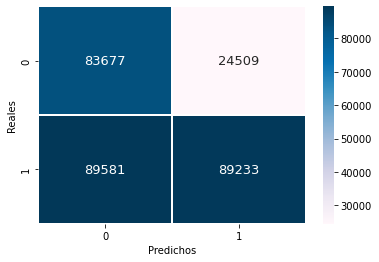

In [29]:
# Imprimo resumen de metricas y la matriz de confusion

model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

Observamos que tenemos un accuracy de 0.50 y un recall de 0.60, procedo a eliminar más variable para ver si es posible mejorar el modelo.


# Regresión Logística n° 2

La elección de las siguientes features responden a la distribución que logré observar en el EDA y el análisis de las variables categóricas anterior sumado a recomendación de un experto enfermero. Las demás han sido descartadas por mero uso de la lógica, como por ejemplo, el id por paciente, visitantes, monto de capital aportado,entre otras. Las demás han sido excluidas por no encontrar correlación suficiente. Es un caso particular el del Dr. Mark, pues parece haber indicios de que todos su pacientes se encuentran internados por más de 8 días, lamentablemente este comportamiento no se repite con sus colegas por lo que decidí desechar la columna, es posible usarla en caso de que hubiera aplicado un modelo donde se usen dummys, pero no he logrado alcanzar con el tiempo para experimentarlo.


In [30]:
df_regre_2 = df_train_test[["Age","gender", 'Severity of Illness','Available Extra Rooms in Hospital','Department','type_stay']]

In [31]:
df_regre_2.head()

,Age,gender,Severity of Illness,Available Extra Rooms in Hospital,Department,type_stay
0,4.0,0.0,0.0,4,2.0,0
1,3.0,0.0,1.0,4,2.0,1
2,2.0,0.0,0.0,2,2.0,0
3,3.0,0.0,2.0,4,2.0,0
4,7.0,1.0,2.0,2,1.0,1


Repetimos el proceso con el dataset más depurado

In [36]:
X = df_regre_2.iloc[:,:5]
y = df_regre_2.iloc[:,-1]

In [37]:
X.head()

,Age,gender,Severity of Illness,Available Extra Rooms in Hospital,Department
0,4.0,0.0,0.0,4,2.0
1,3.0,0.0,1.0,4,2.0
2,2.0,0.0,0.0,2,2.0
3,3.0,0.0,2.0,4,2.0
4,7.0,1.0,2.0,2,1.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)
# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = scaler.transform(X_test)

In [39]:
X_train.head()

,Age,gender,Severity of Illness,Available Extra Rooms in Hospital,Department
397558,3.0,0.0,2.0,21,2.0
146299,7.0,0.0,2.0,4,3.0
249328,3.0,0.0,2.0,3,2.0
38476,5.0,1.0,2.0,2,3.0
401702,2.0,0.0,1.0,4,2.0


In [40]:
#Instanciamos el modelo de Regresion logistica y lo entrenamos. Almacenamos las predicciones
lr = LogisticRegression(penalty='l2', 
                        class_weight='balanced'
                       )
lr.fit(X_train_std, y_train)

y_train_pred = lr.predict(X_train_std)

Accuracy del modelo de Reg. Logistica :    0.597
Recall del modelo de Reg. Logistica :      0.479
Rporte del modelo de Reg. Logistica :   
               precision    recall  f1-score   support

           0       0.48      0.79      0.60    108186
           1       0.79      0.48      0.60    178814

    accuracy                           0.60    287000
   macro avg       0.64      0.64      0.60    287000
weighted avg       0.67      0.60      0.60    287000



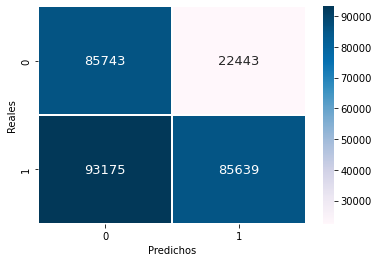

In [41]:
# Imprimimos resumen de metricas y la matriz de confusion

model_name = 'Reg. Logistica'

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de ' + model_name + ' :   ', accuracy_score(y_train, y_train_pred).round(3))
print('Recall del modelo de ' + model_name + ' :     ', recall_score(y_train, y_train_pred).round(3))

print('Rporte del modelo de ' + model_name + ' :   \n', classification_report(y_train, y_train_pred))

Con un resultado ligeramente peor procedo a usar otro modelo, en este caso usaré Ada Boost por entender que se adaptaría mejor a esta situación donde las correlaciones son bajas.

Boosting es un método que pretende mejorar el desempeño de cualquier algoritmo de aprendizaje supervisado mediante la combinación de los resultados de varios clasificadores débiles o de base para obtener un clasificador final robusto. Una de las técnicas más populares de Boosting es el algoritmo Boosting Adaptativo (AdaBoost). Este algoritmo, mediante un entrenamiento iterativo de los clasificadores débiles o de base, le asigna mayor importancia a los datos mal clasificados anteriormente, y de esta manera obtiene un nuevo clasificador. Logra, de esta forma, adaptarse y obtener mejores resultados aumentando la precisión del algoritmo.

#Ada Boost

In [42]:
dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

Voy a seguir usando el dataset más chico así que no volveré a modificar X e y

In [43]:
ada.fit(X_train, y_train)

y_train_pred_ada = ada.predict(X_train)

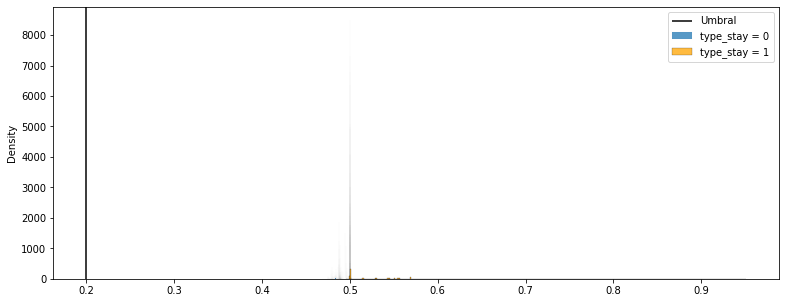

In [44]:
# Histograma de probabilidades
fig, ax01 = plt.subplots(1,1 , figsize=(13,5))
sns.histplot(data = ada.predict_proba(X_train[y_train==0])[:,1], stat = 'density', ax=ax01)
sns.histplot(data = ada.predict_proba(X_train[y_train==1])[:,1], stat = 'density', color = 'orange', ax=ax01)
ylim = plt.ylim()
plt.vlines(0.2, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'type_stay = 0', 'type_stay = 1'])

In [45]:
umbral = 0.5
probs = ada.predict_proba(X_train)[:,1]
y_pred_train_ada_umbral = probs > umbral

Accuracy del modelo de AdaBoost:     0.697
Recall del modelo de AdaBoost:     0.868


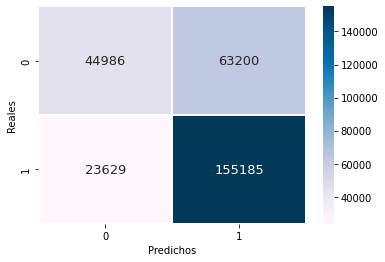

In [46]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost:    ', accuracy_score(y_train, y_pred_train_ada_umbral).round(3))
print('Recall del modelo de AdaBoost:    ', recall_score(y_train, y_pred_train_ada_umbral).round(3))

Con un mejor rendimiento, me decanto por usar Ada Boost, procedo a observar como rinde el modelo sobre el x_test

Observemos el comportamiento en testeo


In [47]:
probs = ada.predict_proba(X_test)[:,1]
y_pred_test_ada_umbral = probs > umbral

Accuracy del modelo de AdaBoost (Testeo):     0.696
Recall del modelo de AdaBoost (Testeo):     0.867


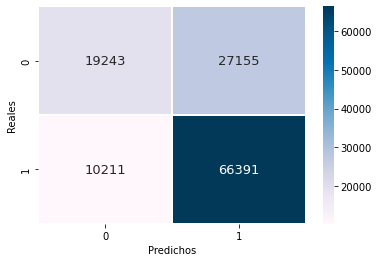

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost (Testeo):    ', accuracy_score(y_test, y_pred_test_ada_umbral).round(3))
print('Recall del modelo de AdaBoost (Testeo):    ', recall_score(y_test, y_pred_test_ada_umbral).round(3))

Tenemos un nivel de Accuracy y Recall mejor que en el modelo de regresión lineal, por lo tanto intentaré mejorar los parametros para obtener mejores resultados.

# Optimización de hiperparámetros

In [49]:
dtc = DecisionTreeClassifier(max_depth = 6, 
                             min_samples_split = 6)

#lrc = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='saga', tol=0.001, max_iter=1500)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 650,
                         learning_rate = 0.7)

In [ ]:
param_grid = {'base_estimator__max_depth': [2, 3, 5],
              'base_estimator__min_samples_split': [6, 24, 96],
              'base_estimator__max_features': [None, 10, 6],
              'base_estimator__class_weight': [None, 'balanced'],
              'base_estimator__splitter': ["best", "random"],
              'n_estimators': [10, 30, 100],
              'learning_rate': [0.3, 0.5, 0.7]
             }

In [ ]:
#scorer = make_scorer(fbeta_score, beta=4)

grid_obj = GridSearchCV(ada, param_grid, scoring = 'recall', n_jobs=-1, verbose=1, cv=3)

In [ ]:
grid_fit = grid_obj.fit(X_train, y_train)

#Atención, esta linea de cód demora aproximadamente 3 horas en completarse

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


In [ ]:
best_ada = grid_fit.best_estimator_
print(grid_fit.best_params_)
print(grid_fit.best_score_)
y_train_pred_ada_opt = best_ada.predict(X_train)
y_test_pred_ada_opt = best_ada.predict(X_test)

#El grid me tardó 3 horas aproximadamente en detectar los mejores resultados.
#En caso de que se llegase a borrar el resultado dejo guardado aquí una copia.
#{'base_estimator__class_weight': None, 'base_estimator__max_depth': 2, 
#'base_estimator__max_features': None, 'base_estimator__min_samples_split': 6,
# 'base_estimator__splitter': 'best', 'learning_rate': 0.3, 'n_estimators': 10}
#0.9999888152559908

In [ ]:
#parametros establecidos según el searchgrid

param_grid = {'base_estimator__max_depth': [2],
              'base_estimator__min_samples_split': [6],
              'base_estimator__max_features': [None],
              'base_estimator__class_weight': [None],
              'base_estimator__splitter': ["best"],
              'n_estimators': [10],
              'learning_rate': [0.3]
             }

#{'base_estimator__class_weight': None, 'base_estimator__max_depth': 2, 
#'base_estimator__max_features': None, 'base_estimator__min_samples_split': 6,
# 'base_estimator__splitter': 'best', 'learning_rate': 0.3, 'n_estimators': 10

In [56]:
dtc = DecisionTreeClassifier(max_depth = 2, 
                             min_samples_split = 6)

ada = AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 10,
                         learning_rate = 0.3
                         )

In [57]:
ada.fit(X_train, y_train)

y_train_pred_ada = ada.predict(X_train)

Accuracy del modelo de AdaBoost optimizado:     0.688
Recall del modelo de AdaBoost optimizado:     1.0


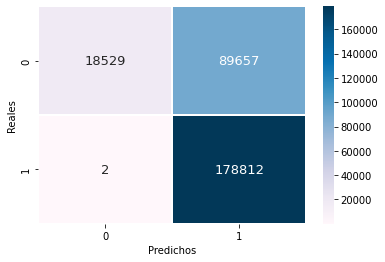

In [60]:
sns.heatmap(confusion_matrix(y_train, y_train_pred_ada), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost optimizado:    ', accuracy_score(y_train, y_train_pred_ada).round(3))
print('Recall del modelo de AdaBoost optimizado:    ', recall_score(y_train, y_train_pred_ada).round(3))

#Resultado guardado de una ejecución anterior.

In [64]:
probs = ada.predict_proba(X_test)[:,1]
y_pred_test_ada_umbral = probs > umbral

Accuracy del modelo de AdaBoost optimizado (Testeo):     0.688
Recall del modelo de AdaBoost optimizado (Testeo):       1.0


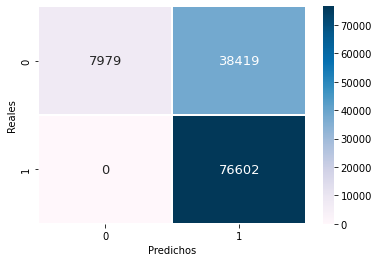

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_ada_umbral), annot=True, cmap='PuBu', fmt='0.0f', linewidths=0.25, 
           annot_kws={'size':13} )
plt.xlabel('Predichos')
plt.ylabel('Reales')

print('Accuracy del modelo de AdaBoost optimizado (Testeo):    ', accuracy_score(y_test, y_pred_test_ada_umbral).round(3))
print('Recall del modelo de AdaBoost optimizado (Testeo):      ', recall_score(y_test, y_pred_test_ada_umbral).round(3))

#

Concluyo que el modelo a pesar de presentar un claro sobreajuste, debe ser testeado con el dataset df_1 (que es el de testeo), para observar su comportamiento.

# Modelo aplicado al segundo dataset

In [67]:
#Pasamos el modelo entrenado al dataset 2
#Convertimos las variables categ del set 2 a números para que lo lea el predictor.

categorical_features2 = list(df_1.select_dtypes(object).columns) # Creo lista de atributos categoricos
df_categ2 = df_1[categorical_features2] # Creo un dataframe con las columnas deseadas y la variable target




In [68]:
enc = OrdinalEncoder()
df_categ2.columns


Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance'],
      dtype='object')

In [69]:
enc.fit(df_categ2[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance']])

OrdinalEncoder()

In [70]:
df_categ2[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance']] = enc.transform(df_categ2[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance']])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [71]:
df_categ2.head()

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
0,2.0,5.0,4.0,2.0,0.0,1.0,2.0,5.0,0.0
1,0.0,4.0,1.0,5.0,0.0,1.0,2.0,0.0,1.0
2,3.0,4.0,1.0,5.0,2.0,1.0,2.0,4.0,0.0
3,2.0,5.0,4.0,2.0,0.0,1.0,2.0,4.0,1.0
4,1.0,0.0,1.0,5.0,0.0,1.0,0.0,1.0,0.0


In [72]:
df_concatenado2 = pd.concat([df_categ2, df_1.select_dtypes(np.number)], axis = 1)

In [73]:
df_concatenado2.head()

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit
0,2.0,5.0,4.0,2.0,0.0,1.0,2.0,5.0,0.0,3,10,2858,2,4749.640225
1,0.0,4.0,1.0,5.0,0.0,1.0,2.0,0.0,1.0,2,4,65657,2,4122.261324
2,3.0,4.0,1.0,5.0,2.0,1.0,2.0,4.0,0.0,2,7,45598,3,5459.067882
3,2.0,5.0,4.0,2.0,0.0,1.0,2.0,4.0,1.0,2,1,31132,2,3987.033318
4,1.0,0.0,1.0,5.0,0.0,1.0,0.0,1.0,0.0,2,7,125021,2,4770.789695


In [74]:
#Creo la variable x_testeo_final 

x_testeo_final = df_concatenado2[["Age","gender", 'Severity of Illness','Available Extra Rooms in Hospital','Department']]

In [76]:
#Usamos el predictor que creé sobre el dataset de testeo
prediccion_df2 = ada.predict(x_testeo_final)

In [77]:
print(prediccion_df2)

[1 1 1 ... 1 1 1]


In [78]:
resultado = pd.DataFrame(prediccion_df2)
resultado.set_axis(["pred"], axis = 1,inplace = True)

In [79]:
#Una vez creado el Dataset con los resultados, lo exporto.
resultado.to_csv("Leito2022.csv", index = False)

El modelo devolvió un recall de 0.66 y un accuracy de 0.68, no son malos números y se encuentran equilibrados. Evidentemente se puede mejorar la predicción pero por falta de tiempo no será posible.

#PIPELINE

In [80]:
from sklearn.pipeline import Pipeline

In [82]:
steps = [('var_categ', OrdinalEncoder()),
         ('Adaboost', AdaBoostClassifier(base_estimator = dtc, 
                         n_estimators = 10,
                         learning_rate = 0.3
                         ))]

Nunca he generado un pipeline, por lo que esto es una simple prueba no concluyente de su uso. Por falta de tiempo, es lo que he podido generar.

In [84]:
pipeline = Pipeline(steps)

In [85]:
pipeline

Pipeline(steps=[('var_categ', OrdinalEncoder()),
                ('Adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          min_samples_split=6),
                                    learning_rate=0.3, n_estimators=10))])

In [87]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('var_categ', OrdinalEncoder()),
                ('Adaboost',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          min_samples_split=6),
                                    learning_rate=0.3, n_estimators=10))])